In [4]:
#Librerias
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import cm as cm

In [5]:
##LIMPIEZA DE DATOS Y CREACIÓN DE DATAFRAME

In [6]:
movies = pd.read_csv('../Data_Proyect/Dataset/IMDb movies.csv', low_memory=False)
movies

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [8]:
ratings = pd.read_csv('../Data_Proyect/Dataset/IMDb_ratings.csv', low_memory=False)
ratings

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,5.3,398,5.5,6.0,13,9,26,65,104,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,7.7,724,7.9,8.0,65,139,288,170,42,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,7.9,265,7.8,8.0,63,29,61,61,31,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,6.4,194,9.4,10.0,176,0,2,2,1,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [10]:
titles = pd.read_csv('../Data_Proyect/Dataset/IMDb title_principals.csv', low_memory=False)
titles

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...
835508,tt9914942,6,nm3678448,writer,NaN,NaN
835509,tt9914942,7,nm9361716,writer,novel,NaN
835510,tt9914942,8,nm2262072,composer,NaN,NaN
835511,tt9914942,9,nm1966322,cinematographer,NaN,NaN


In [11]:
#unir los 3 dataframe en uno solo

In [12]:
moviesandtitles = pd.merge(left=movies,right=titles, left_on='imdb_title_id', right_on='imdb_title_id')
moviesandtitles

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,ordering,imdb_name_id,category,job,characters
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,NaN,NaN,NaN,1.0,2.0,4,nm0085156,director,NaN,NaN
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,NaN,NaN,NaN,7.0,7.0,1,nm0846887,actress,NaN,"[""Kate Kelly""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835489,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,6,nm3678448,writer,NaN,NaN
835490,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,7,nm9361716,writer,novel,NaN
835491,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,8,nm2262072,composer,NaN,NaN
835492,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,NaN,$ 59794,NaN,NaN,2.0,9,nm1966322,cinematographer,NaN,NaN


In [13]:
Peliculas = moviesandtitles = pd.merge(left=moviesandtitles,right=ratings, left_on='imdb_title_id', right_on='imdb_title_id')
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
2,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835489,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835490,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835491,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0
835492,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,6.8,4.0,7.5,4.0,7.0,4.0,6.7,13.0,6.7,60.0


In [14]:
#eliminar datos duplicados del dataframe

In [15]:
Peliculas.drop_duplicates('imdb_title_id')

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
4,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
14,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
24,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
34,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835445,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
835455,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
835465,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
835475,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [16]:
Peliculas.sort_values('title', inplace=True)
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
167628,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167631,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167630,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167629,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
167627,tt0073045,"""Giliap""","""Giliap""",1975,1975-11-16,"Crime, Drama",137,Sweden,Swedish,Roy Andersson,...,6.0,40.0,6.7,14.0,5.7,35.0,6.9,64.0,6.4,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697690,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697689,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697688,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0
697686,tt3509772,ärtico,ärtico,2014,2015-11-11,Drama,78,Spain,Spanish,Gabriel Velázquez,...,7.1,16.0,6.2,9.0,5.0,1.0,5.3,3.0,5.8,50.0


In [17]:
Peliculas.drop_duplicates('imdb_title_id', keep="last", inplace=True)
Peliculas.sort_index(inplace=True) 

In [18]:
Peliculas

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
3,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
11,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
20,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
24,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
36,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835454,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
835460,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
835473,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
835481,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [19]:
#elimino la columna Imdb_tittle_id
Peliculas = Peliculas.drop(['imdb_title_id'], axis=1)

In [20]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85846 entries, 3 to 835492
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   original_title             85846 non-null  object 
 2   year                       85846 non-null  object 
 3   date_published             85846 non-null  object 
 4   genre                      85846 non-null  object 
 5   duration                   85846 non-null  int64  
 6   country                    85785 non-null  object 
 7   language                   85018 non-null  object 
 8   director                   85768 non-null  object 
 9   writer                     84283 non-null  object 
 10  production_company         81397 non-null  object 
 11  actors                     85786 non-null  object 
 12  description                83731 non-null  object 
 13  avg_vote                   85846 non-null  fl

In [21]:
Peliculas.drop(['original_title', 'date_published', 'imdb_name_id', 'category', 'job', 'characters', 'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1', 'top1000_voters_rating', 'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes', 'non_us_voters_rating', 'non_us_voters_votes'], axis = 'columns', inplace=True)

In [22]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85846 entries, 3 to 835492
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  ob

In [23]:
Peliculas.drop(['ordering'], axis = 'columns', inplace=True)

In [24]:
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
3,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0
11,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0
20,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0
24,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0
36,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835454,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,6.0,26.0,NaN,NaN,6.2,11.0,5.7,11.0,5.0,2.0
835460,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.6,109.0,NaN,NaN,7.4,29.0,8.0,47.0,7.3,30.0
835473,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
835481,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0


In [25]:
Peliculas.reset_index(level=0, inplace=True)

In [26]:
Peliculas.drop(['index'], axis = 'columns', inplace=True)

In [27]:
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0
3,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85841,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,6.0,26.0,NaN,NaN,6.2,11.0,5.7,11.0,5.0,2.0
85842,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.6,109.0,NaN,NaN,7.4,29.0,8.0,47.0,7.3,30.0
85843,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85844,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0


In [28]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [29]:
Peliculas.drop(['allgenders_0age_votes','allgenders_18age_votes','allgenders_30age_votes','allgenders_45age_votes'], axis = 'columns', inplace=True)

In [30]:
Peliculas.drop(['males_allages_votes','males_0age_votes','males_18age_votes','males_30age_votes','males_45age_votes'], axis = 'columns', inplace=True)

In [31]:
Peliculas.drop(['females_allages_votes','females_0age_votes','females_18age_votes','females_30age_votes','females_45age_votes'], axis = 'columns', inplace=True)

In [32]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [33]:
##DATAFRAME FINAL
Peliculas

,title,year,genre,duration,country,language,director,writer,production_company,actors,...,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
0,Miss Jerry,1894,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,6.2,7.0,5.9,5.6,6.7,6.0,7.3,5.9,5.7,4.5
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,6.1,6.0,6.2,6.0,6.2,6.2,NaN,5.9,6.2,6.6
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",...,5.9,NaN,5.5,5.9,6.2,5.7,NaN,5.8,5.8,6.8
3,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",...,5.1,NaN,5.2,4.9,5.2,5.9,NaN,5.7,5.5,6.1
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",...,7.0,8.0,7.0,7.0,7.0,7.2,7.0,7.0,7.3,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85841,Le lion,2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",...,5.3,6.0,5.6,5.3,5.2,6.0,NaN,6.2,5.7,5.0
85842,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",...,7.8,NaN,7.6,7.6,7.9,7.6,NaN,7.4,8.0,7.3
85843,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",...,6.0,NaN,1.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
85844,Sokagin Çocuklari,2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",...,3.1,NaN,6.5,1.8,1.0,4.0,NaN,NaN,NaN,7.0


In [34]:
Peliculas.describe()

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,males_0age_avg_vote,males_18age_avg_vote,males_30age_avg_vote,males_45age_avg_vote,females_allages_avg_vote,females_0age_avg_vote,females_18age_avg_vote,females_30age_avg_vote,females_45age_avg_vote
count,85846.000000,85846.000000,8.584600e+04,13305.000000,78251.000000,74057.000000,33358.000000,85140.000000,85836.000000,85766.000000,85845.000000,27410.000000,84381.000000,85834.000000,85745.000000,85765.000000,22117.000000,79326.000000,84902.000000,83048.000000
mean,100.350407,5.898579,9.494453e+03,55.896881,46.044012,27.479874,6.195051,6.011241,5.862828,5.678169,5.817099,6.221306,5.946301,5.817684,5.630131,6.039305,6.147308,6.321438,6.071089,6.022184
std,22.550865,1.234853,5.357709e+04,17.784874,178.519029,58.339544,1.849119,1.439624,1.279272,1.250527,1.247913,1.767543,1.463981,1.289092,1.263938,1.346087,1.878342,1.738790,1.454205,1.541844
min,41.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,88.000000,5.200000,2.050000e+02,43.000000,4.000000,3.000000,5.000000,5.300000,5.100000,5.000000,5.100000,5.000000,5.100000,5.100000,4.900000,5.300000,5.000000,5.500000,5.300000,5.200000
50%,96.000000,6.100000,4.840000e+02,57.000000,9.000000,8.000000,6.000000,6.200000,6.100000,5.900000,6.000000,6.000000,6.200000,6.000000,5.900000,6.300000,6.000000,6.500000,6.300000,6.200000
75%,108.000000,6.800000,1.767000e+03,69.000000,27.000000,23.000000,7.200000,7.000000,6.800000,6.600000,6.700000,7.200000,7.000000,6.700000,6.500000,7.000000,7.100000,7.400000,7.000000,7.000000
max,808.000000,9.900000,2.278845e+06,100.000000,10472.000000,999.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [35]:
def split_multicolumn(genres):
    result_df = genres.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in genres[genres.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(','):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [36]:
genres_df = split_multicolumn(Peliculas.genre)
movie_genres = genres_df.sum().sort_values(ascending=False)

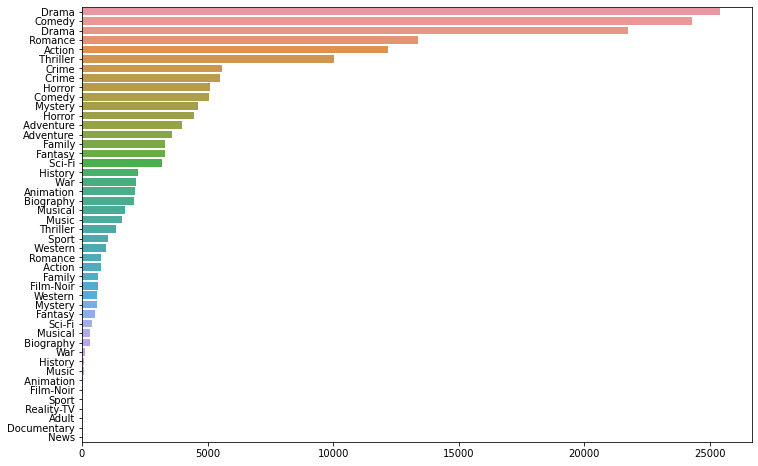

In [37]:
#Ranking de categorias
plt.figure(figsize=(12,8))
sns.barplot(x=movie_genres.values, y=movie_genres.index);

In [38]:
Peliculas.year.unique()

array(['1894', '1906', '1911', '1912', '1919', '1913', '1914', '1915',
       '1916', '1917', '1918', '1920', '1921', '1924', '1922', '1923',
       '1925', '1926', '1935', '1927', '1928', '1983', '1929', '1930',
       '1932', '1931', '1937', '1938', '1933', '1934', '1936', '1940',
       '1939', '1942', '1943', '1941', '1948', '1944', '2001', '1946',
       '1945', '1947', '1973', '1949', '1950', '1952', '1951', '1962',
       '1953', '1954', '1955', '1961', '1956', '1958', '1957', '1959',
       '1960', '1963', '1965', '1971', '1964', '1966', '1968', '1967',
       '1969', '1976', '1970', '1979', '1972', '1981', '1978', '2000',
       '1989', '1975', '1974', '1986', '1990', '2018', '1977', '1982',
       '1980', '1993', '1984', '1985', '1988', '1987', '2005', '1991',
       '2002', '1994', '1992', '1995', '2017', '1997', '1996', '2006',
       '1999', '1998', '2007', '2008', '2003', '2004', '2010', '2009',
       '2011', '2013', '2012', '2016', '2015', '2014', '2019', '2020',
      

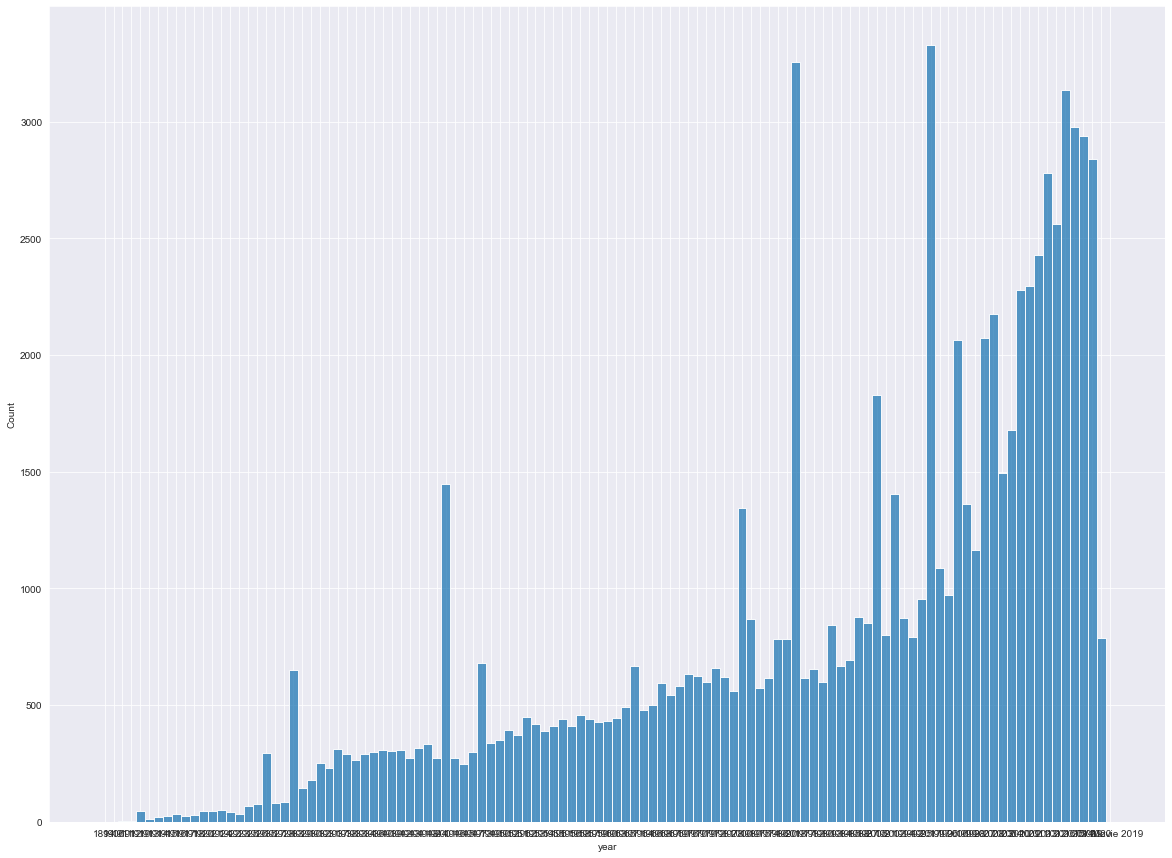

In [39]:
#Crecimieto de peliculas por año
sns.set_style('darkgrid')
plt.figure(figsize=(20,15))
sns.histplot(Peliculas.year,kde=False);

In [40]:
## Ratios Metascore

### Nota: El metascore es un ratio que evalua la calidad objetiva de las peliculas, no es una puntuación por critica

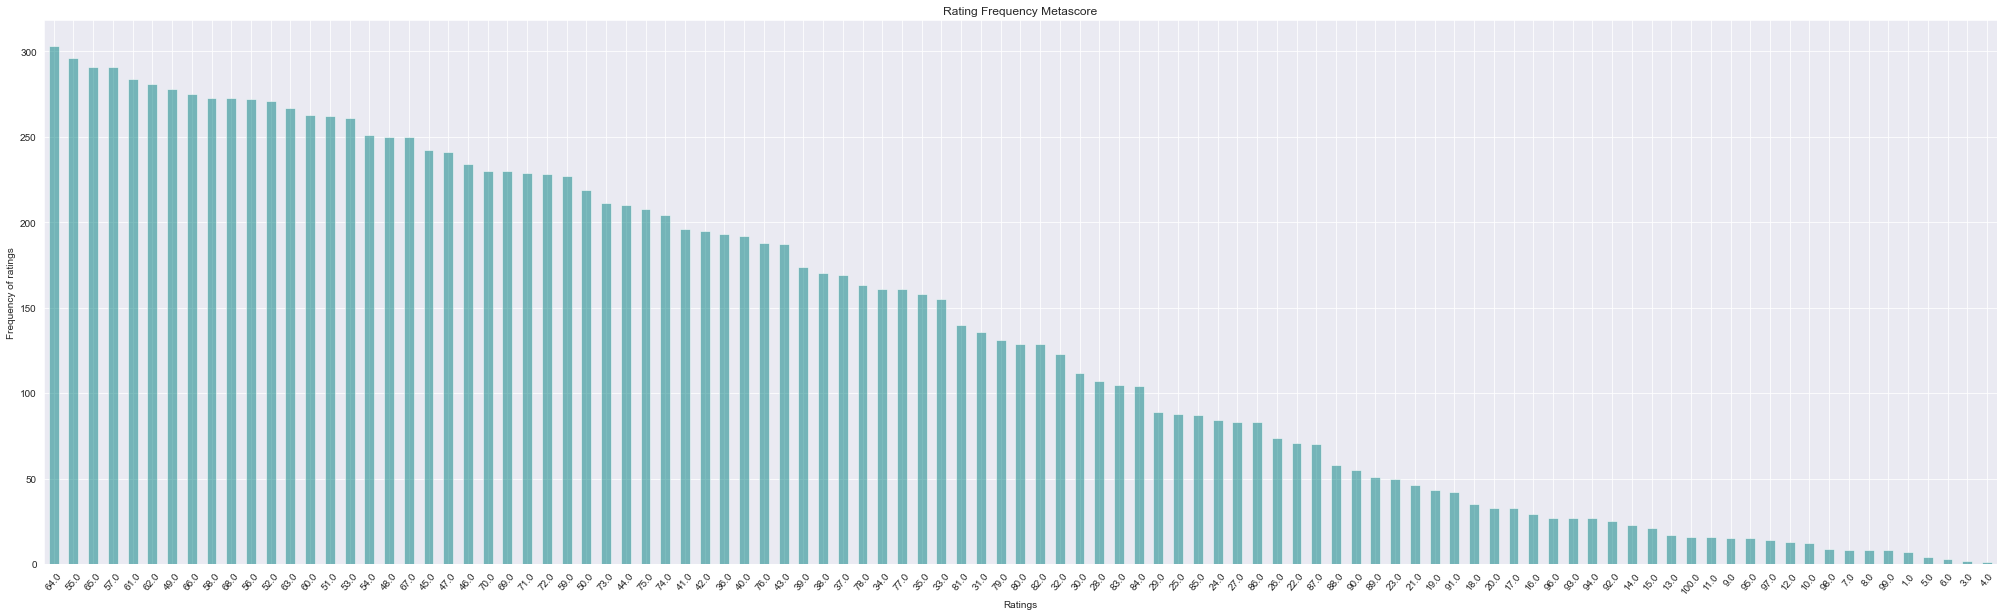

In [41]:
rating_freq = Peliculas['metascore'].value_counts()

plt.figure(figsize=(35,10))
rating_freq.plot.bar(color='teal',alpha=0.5)
plt.xticks(rotation=50)
plt.xlabel("Ratings")
plt.ylabel("Frequency of ratings")
plt.title("Rating Frequency Metascore")
plt.show()
plt.close()

In [42]:
## ¿Que idiomas en su versión original tiene mayor representación?

In [43]:
idiomas_traducidos = Peliculas.language.value_counts().head(20)
idiomas_traducidos

English             35935
French               3903
Spanish              2831
Japanese             2826
Italian              2731
Hindi                2106
German               1761
Turkish              1355
Russian              1345
English, Spanish     1108
Korean                976
Portuguese            917
English, French       857
Malayalam             839
Tamil                 831
Mandarin              780
Telugu                681
Cantonese             623
Persian               601
Swedish               563
Name: language, dtype: int64

<AxesSubplot:title={'center':'¿Que idiomas en su versión original tiene mayor representación?'}>

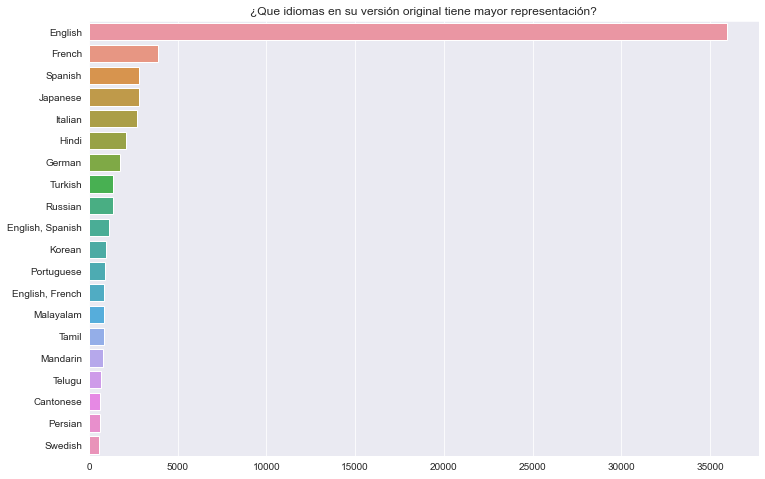

In [44]:
languages = Peliculas.language.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que idiomas en su versión original tiene mayor representación?')
sns.barplot(x=languages.values, y=languages.index)

In [45]:
Países_productores = Peliculas.country.value_counts().head(20)
Países_productores

USA             28505
India            6065
UK               4111
Japan            3077
France           3055
Italy            2444
Canada           1802
Germany          1396
Turkey           1351
Hong Kong        1239
Spain            1225
South Korea      1103
Russia            802
Australia         785
Soviet Union      766
Brazil            736
UK, USA           683
Mexico            655
Iran              642
Sweden            622
Name: country, dtype: int64

<AxesSubplot:title={'center':'¿Que país ha sido el que a producido más peliculas?'}>

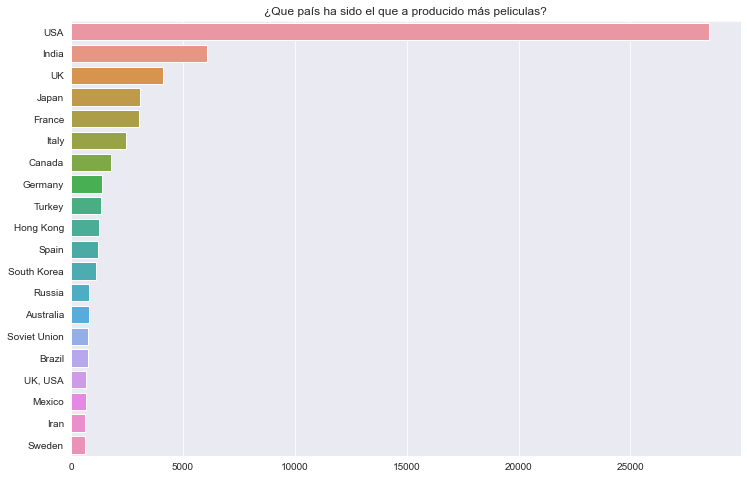

In [46]:
country = Peliculas.country.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que país ha sido el que a producido más peliculas?')
sns.barplot(x=country.values, y=country.index)

In [47]:
Peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85846 entries, 0 to 85845
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      85846 non-null  object 
 1   year                       85846 non-null  object 
 2   genre                      85846 non-null  object 
 3   duration                   85846 non-null  int64  
 4   country                    85785 non-null  object 
 5   language                   85018 non-null  object 
 6   director                   85768 non-null  object 
 7   writer                     84283 non-null  object 
 8   production_company         81397 non-null  object 
 9   actors                     85786 non-null  object 
 10  description                83731 non-null  object 
 11  avg_vote                   85846 non-null  float64
 12  votes                      85846 non-null  int64  
 13  budget                     23709 non-null  obj

In [48]:
Directores = Peliculas.director.value_counts().head(20)
Directores

Jesús Franco          87
Michael Curtiz        85
Lesley Selander       78
Lloyd Bacon           73
William Beaudine      70
Richard Thorpe        68
John Ford             67
Gordon Douglas        64
Raoul Walsh           61
Mervyn LeRoy          59
Cheh Chang            57
Norman Taurog         56
Giannis Dalianidis    56
Takashi Miike         55
Priyadarshan          55
Carlo Vanzina         53
Alfred E. Green       53
Joseph Kane           53
Claude Chabrol        52
William A. Seiter     52
Name: director, dtype: int64

<AxesSubplot:title={'center':'¿Que director ha producido más peliculas?'}>

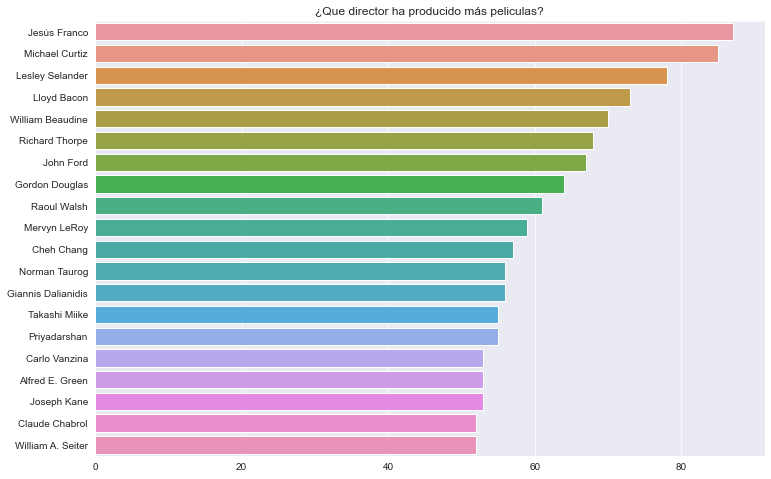

In [49]:
director = Peliculas.director.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Que director ha producido más peliculas?')
sns.barplot(x=director.values, y=director.index)

In [50]:
writer = Peliculas.writer.value_counts().head(20)
writer

Jing Wong                                84
Kuang Ni                                 45
Woody Allen                              40
Erdogan Tünas                            35
Leonardo Benvenuti, Piero De Bernardi    34
Carlo Vanzina, Enrico Vanzina            32
Cheh Chang, Kuang Ni                     31
Giannis Dalianidis                       29
Safa Önal                                27
Ingmar Bergman                           27
William Shakespeare                      25
Agenore Incrocci, Furio Scarpelli        25
Ki-duk Kim                               24
Franco Castellano, Giuseppe Moccia       23
Mario Amendola, Bruno Corbucci           23
Javed Akhtar, Javed Akhtar               23
Sang-soo Hong                            23
Spede Pasanen                            22
Sadik Sendil                             22
Larry Cohen                              22
Name: writer, dtype: int64

<AxesSubplot:title={'center':'¿Quién ha escrito más guiones de peliculas?'}>

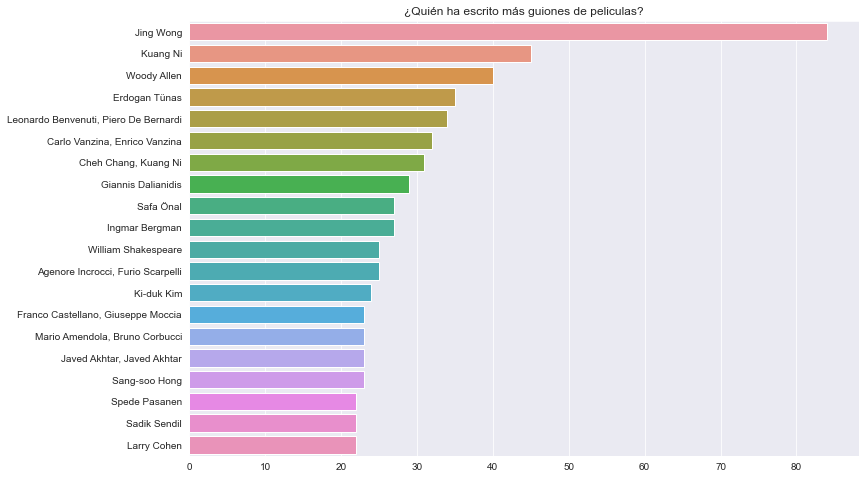

In [51]:
writer = Peliculas.writer.value_counts().head(20)

plt.figure(figsize=(12,8))
plt.title('¿Quién ha escrito más guiones de peliculas?')
sns.barplot(x=writer.values, y=writer.index)